# SectionProperties from DXF by finite mesh

https://pypi.org/project/sectionproperties/


https://sectionproperties.readthedocs.io/en/stable/examples.html



<img width="80%" src=https://sectionproperties.readthedocs.io/en/stable/_images/logo-dark-mode.png>





In [1]:
# %pip install sectionproperties
# if needed, uncomment line, install , restart

%matplotlib inline

## COLAB        (calculation=0.0) (plot=0.0) (interactive=0.5)
## VSCODE       (calculation=0.8) (plot=0.8) (interactive=0.5)
## JUPYTER LAB  (calculation=0.8) (plot=0.8) (interactive=0.5)

Import the appropriate classes. For example:

In [2]:
from sectionproperties.pre.geometry import Geometry
from sectionproperties.analysis.section import Section



# 1 Simple Example

Calculate section properties of a circle.

The following example calculates the geometric, warping and plastic properties
of a 50 mm diameter circle. The circle is discretised with 64 points and a mesh
size of 2.5 mm\ :sup:`2`.

The geometry and mesh are plotted, and the mesh information printed to the terminal before the analysis is carried out. Detailed time information is printed to the terminal during the cross-section analysis stage. Once the analysis is complete, the cross-section properties are printed to the terminal. The centroidal axis second moments of area and torsion constant are saved to variables and it is shown that, for a circle, the torsion constant is equal to the sum of the second moments of area.


In [3]:
# sphinx_gallery_thumbnail_number = 1

import sectionproperties.pre.library.primitive_sections as sections
from sectionproperties.analysis.section import Section

Create a 50 diameter circle discretised by 64 points



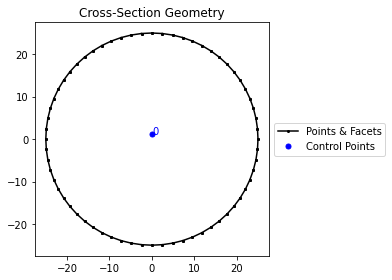

<Axes: title={'center': 'Cross-Section Geometry'}>

In [4]:
geometry = sections.circular_section(d=50, n=64)
geometry.plot_geometry()

Create a mesh with a mesh size of 2.5 and display information about it



Mesh Statistics:

- 2557 nodes

- 1246 elements

- 1 region

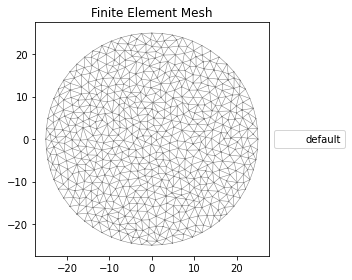

<Axes: title={'center': 'Finite Element Mesh'}>

In [5]:
geometry.create_mesh(mesh_sizes=[2.5])

section = Section(geometry, time_info=True)
section.display_mesh_info()
section.plot_mesh()

perform a geometric, warping and plastic analysis, displaying the time info



In [6]:
section.calculate_geometric_properties()

Output()

In [7]:
section.calculate_warping_properties()

Output()

In [8]:

section.calculate_plastic_properties()

Output()

Print the results to the terminal



In [9]:
section.display_results()

     Section Properties      
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property  ┃         Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ area      │  1.960343e+03 │
│ perimeter │  1.570166e+02 │
│ qx        │ -1.296030e-11 │
│ qy        │  1.955325e-12 │
│ ixx_g     │  3.058119e+05 │
│ iyy_g     │  3.058119e+05 │
│ ixy_g     │ -1.551115e-11 │
│ cx        │  9.974402e-16 │
│ cy        │ -6.611241e-15 │
│ ixx_c     │  3.058119e+05 │
│ iyy_c     │  3.058119e+05 │
│ ixy_c     │ -1.551115e-11 │
│ zxx+      │  1.223248e+04 │
│ zxx-      │  1.223248e+04 │
│ zyy+      │  1.223248e+04 │
│ zyy-      │  1.223248e+04 │
│ rx        │  1.248996e+01 │
│ ry        │  1.248996e+01 │
│ i11_c     │  3.058119e+05 │
│ i22_c     │  3.058119e+05 │
│ phi       │  0.000000e+00 │
│ z11+      │  1.223248e+04 │
│ z11-      │  1.223248e+04 │
│ z22+      │  1.223248e+04 │
│ z22-      │  1.223248e+04 │
│ r11       │  1.248996e+01 │
│ r22       │  1.248996e+01 │
│ j         │  6.116238e+05 │
│ x_se      │  1.695293e-15 │
│ y_se      │  2.627651e-15 │
│ x1_se     │  6.978531e-16 │
│ y2_se     │  9.238892e-15 │
│ x_st      │  1.695293e-15 │
│ y_st      │  2.627651e-15 │
│ gamma     │  1.531487e-21 │
│ a_sx      │  1.680296e+03 │
│ a_sy      │  1.680296e+03 │
│ a_s11     │  1.680296e+03 │
│ a_s22     │  1.680296e+03 │
│ beta_x+   │ -1.343061e-14 │
│ beta_x-   │  1.343061e-14 │
│ beta_y+   │  1.038822e-15 │
│ beta_y-   │ -1.038822e-15 │
│ beta_11+  │ -1.343061e-14 │
│ beta_11-  │  1.343061e-14 │
│ beta_22+  │  1.038822e-15 │
│ beta_22-  │ -1.038822e-15 │
│ x_pc      │  9.974402e-16 │
│ y_pc      │ -6.611241e-15 │
│ x11_pc    │  9.974402e-16 │
│ y22_pc    │ -6.611241e-15 │
│ sxx       │  2.078317e+04 │
│ syy       │  2.078317e+04 │
│ s11       │  2.078317e+04 │
│ s22       │  2.078317e+04 │
│ sf_xx+    │  1.699016e+00 │
│ sf_xx-    │  1.699016e+00 │
│ sf_yy+    │  1.699016e+00 │
│ sf_yy-    │  1.699016e+00 │
│ sf_11+    │  1.699016e+00 │
│ sf_11-    │  1.699016e+00 │
│ sf_22+    │  1.699016e+00 │
│ sf_22-    │  1.699016e+00 │
└───────────┴───────────────┘

Get and print the second moments of area and the torsion constant



In [10]:
(ixx_c, iyy_c, ixy_c) = section.get_ic()
j = section.get_j()
print("Ixx + Iyy = {0:.3f}".format(ixx_c + iyy_c))
print("J = {0:.3f}".format(j))

Ixx + Iyy = 611623.837
J = 611623.837


# 2 Creating a Nastran Section

https://sectionproperties.readthedocs.io/en/stable/gen/sectionproperties.pre.library.nastran_sections.html#


Calculate section properties of Nastran HAT1 section.

The following example demonstrates how to create a cross-section defined in
a Nastran-based finite element analysis program. The following creates a
HAT1 cross-section and calculates the geometric, warping and plastic properties.
The HAT1 cross-section is meshed with a maximum elemental area of 0.005.

The geometry and mesh are plotted, and the mesh information printed to the terminal
before the analysis is carried out. Detailed time information is printed to the
terminal during the cross-section analysis stage. Once the analysis is complete,
the cross-section properties are printed to the terminal. The centroidal
axis second moments of area and torsion constant are saved to variables and it
is shown that, for non-circular sections, the torsion constant is not equal to the
sum of the second moments of area.


In [11]:
# sphinx_gallery_thumbnail_number = 1

from typing import get_origin
import sectionproperties.pre.library.nastran_sections as nsections
from sectionproperties.analysis.section import Section

Create a HAT1 section



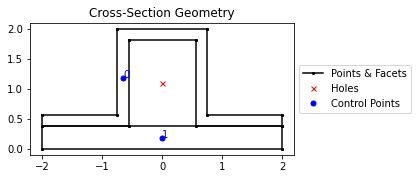

MULTIPOLYGON (((-2 0.375, -0.5625 0.375, -0.5625 1.8125, 0.5625 1.8125, 0.5625 0.375, 2 0.375, 2 0.5625, 0.75 0.5625, 0.75 2, -0.75 2, -0.75 0.5625, -2 0.5625, -2 0.375)), ((-2 0, 2 0, 2 0.375, -2 0.375, -2 0)))


In [12]:
geometry = nsections.nastran_hat1(dim_1=4.0, dim_2=2.0, dim_3=1.5, dim_4=0.1875, dim_5=0.375)
geometry.plot_geometry()  # plot the geometry
print(geometry.geom)

Create a mesh with a maximum elemental area of 0.005



Mesh Statistics:

- 2038 nodes

- 926 elements

- 2 regions

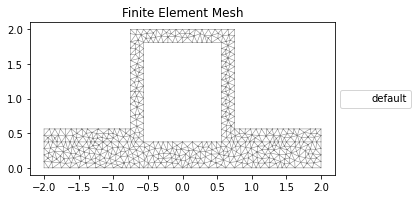

<Axes: title={'center': 'Finite Element Mesh'}>

In [13]:
geometry.create_mesh(mesh_sizes=[0.005])

section = Section(geometry, time_info=True)  # create a Section object
section.display_mesh_info()  # display the mesh information
section.plot_mesh()  # plot the generated mesh`

Perform a geometric, warping and plastic analysis, displaying the time info



In [14]:
section.calculate_geometric_properties()
section.calculate_warping_properties()
section.calculate_plastic_properties()

section.display_results()

Output()

Output()

Output()

     Section Properties      
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property  ┃         Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ area      │  2.789062e+00 │
│ perimeter │  1.200000e+01 │
│ qx        │  1.626709e+00 │
│ qy        │ -7.546047e-17 │
│ ixx_g     │  1.935211e+00 │
│ iyy_g     │  3.233734e+00 │
│ ixy_g     │ -4.371503e-16 │
│ cx        │ -2.705586e-17 │
│ cy        │  5.832458e-01 │
│ ixx_c     │  9.864400e-01 │
│ iyy_c     │  3.233734e+00 │
│ ixy_c     │ -3.931383e-16 │
│ zxx+      │  6.962676e-01 │
│ zxx-      │  1.691294e+00 │
│ zyy+      │  1.616867e+00 │
│ zyy-      │  1.616867e+00 │
│ rx        │  5.947113e-01 │
│ ry        │  1.076770e+00 │
│ i11_c     │  3.233734e+00 │
│ i22_c     │  9.864400e-01 │
│ phi       │ -9.000000e+01 │
│ z11+      │  1.616867e+00 │
│ z11-      │  1.616867e+00 │
│ z22+      │  1.691294e+00 │
│ z22-      │  6.962676e-01 │
│ r11       │  1.076770e+00 │
│ r22       │  5.947113e-01 │
│ j         │  9.878443e-01 │
│ x_se      │  4.822719e-05 │
│ y_se      │  4.674792e-01 │
│ x1_se     │  1.157666e-01 │
│ y2_se     │  4.822719e-05 │
│ x_st      │  4.822719e-05 │
│ y_st      │  4.674792e-01 │
│ gamma     │  1.160803e-01 │
│ a_sx      │  1.648312e+00 │
│ a_sy      │  6.979733e-01 │
│ a_s11     │  6.979733e-01 │
│ a_s22     │  1.648312e+00 │
│ beta_x+   │ -2.746928e-01 │
│ beta_x-   │  2.746928e-01 │
│ beta_y+   │  9.645438e-05 │
│ beta_y-   │ -9.645438e-05 │
│ beta_11+  │  9.645438e-05 │
│ beta_11-  │ -9.645438e-05 │
│ beta_22+  │  2.746928e-01 │
│ beta_22-  │ -2.746928e-01 │
│ x_pc      │ -2.705586e-17 │
│ y_pc      │  3.486328e-01 │
│ x11_pc    │  3.272102e-16 │
│ y22_pc    │  3.486328e-01 │
│ sxx       │  1.140530e+00 │
│ syy       │  2.603760e+00 │
│ s11       │  2.603760e+00 │
│ s22       │  1.140530e+00 │
│ sf_xx+    │  1.638062e+00 │
│ sf_xx-    │  6.743533e-01 │
│ sf_yy+    │  1.610373e+00 │
│ sf_yy-    │  1.610373e+00 │
│ sf_11+    │  1.610373e+00 │
│ sf_11-    │  1.610373e+00 │
│ sf_22+    │  6.743533e-01 │
│ sf_22-    │  1.638062e+00 │
└───────────┴───────────────┘

Get the second moments of area and the torsion constant



In [15]:
(ixx_c, iyy_c, ixy_c) = section.get_ic()
j = section.get_j()
print("Ixx + Iyy = {0:.3f}".format(ixx_c + iyy_c))
print("J = {0:.3f}".format(j))

Ixx + Iyy = 4.220
J = 0.988


# 3 Creating Custom Geometry


Calculate section properties of a user-defined section from points and facets.

The following example demonstrates how geometry objects can be created from a
list of points, facets, holes and control points. An straight angle section with
a plate at its base is created from a list of points and facets. The bottom plate
is assigned a separate control point meaning two discrete regions are created.
Creating separate regions allows the user to control the mesh size in each region
and assign material properties to different regions. The geometry is cleaned to
remove the overlapping facet at the junction of the angle and the plate. A
geometric, warping and plastic analysis is then carried out.

The geometry and mesh are plotted before the analysis is carried out. Once the
analysis is complete, a plot of the various calculated centroids is generated.


In [16]:
# sphinx_gallery_thumbnail_number = 2

from sectionproperties.pre.geometry import CompoundGeometry
from sectionproperties.analysis.section import Section

Define parameters for the angle section



In [17]:
a = 1
b = 2
t = 0.1

Build the lists of points, facets, holes and control points



In [18]:
points = [
    [-t / 2, -2 * a],
    [t / 2, -2 * a],
    [t / 2, -t / 2],
    [a, -t / 2],
    [a, t / 2],
    [-t / 2, t / 2],
    [-b / 2, -2 * a],
    [b / 2, -2 * a],
    [b / 2, -2 * a - t],
    [-b / 2, -2 * a - t],
]
facets = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 0],
    [6, 7],
    [7, 8],
    [8, 9],
    [9, 6],
]
holes = []
control_points = [[0, 0], [0, -2 * a - t / 2]]

Because we have two separate geometry regions (as indicated by our control_points)
we create a CompoundGeometry from points



In [19]:
geometry = CompoundGeometry.from_points(points, facets, control_points, holes)

Create the mesh and section. For the mesh, use a smaller refinement for the angle region.



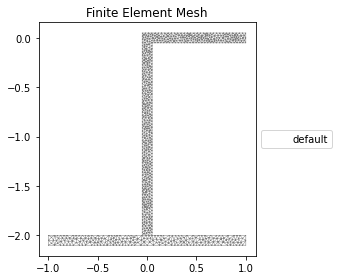

<Axes: title={'center': 'Finite Element Mesh'}>

In [20]:
geometry.create_mesh(mesh_sizes=[0.0005, 0.001])

section = Section(geometry)
section.plot_mesh()  # plot the generated mesh

Perform a geometric, warping and plastic analysis



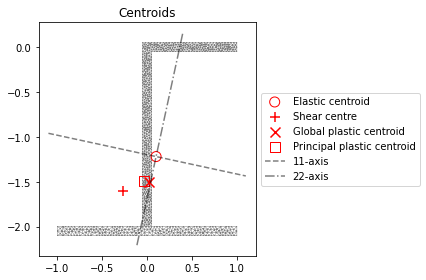

<Axes: title={'center': 'Centroids'}>

In [21]:
section.calculate_geometric_properties()
section.calculate_warping_properties()
section.calculate_plastic_properties()

section.plot_centroids()

# 4 Creating a Built-Up Section

Merge two sections together into a single larger section.

The following example demonstrates how to combine multiple geometry objects into
a single geometry object. A 150x100x6 RHS is modelled with a solid 50x50 triangular
section on its top and a 100x100x6 angle section on its right side.
The three geometry objects are combined together as a :class:`~sectionproperties.pre.geometry.CompoundGeometry`
object using the `+` operator.

To manipulate individual geometries into the final shape, there are a variety of
methods available to move and align. This example uses `.align_center()`, `.align_to()`,
and `.shift_section()`.

The geometry and mesh are plotted, and the mesh information printed to the terminal
before the analysis is carried out. Detailed time information is printed to the
terminal during the cross-section analysis stage. Once the analysis is complete,
the centroids are plotted.


In [22]:
# sphinx_gallery_thumbnail_number = 1

import sectionproperties.pre.library.steel_sections as steel_sections
from sectionproperties.pre.geometry import Geometry
from sectionproperties.analysis.section import Section

Create a 150x100x6 RHS



In [23]:
rhs = steel_sections.rectangular_hollow_section(d=150, b=100, t=6, r_out=15, n_r=8)

Create a triangular section from points, facets, and control points



In [24]:
points = [[0, 0], [50, 0], [25, 50]]
facets = [[0, 1], [1, 2], [2, 0]]
control_points = [[25, 25]]
triangle = Geometry.from_points(points, facets, control_points)
triangle = triangle.align_center(rhs).align_to(rhs, on="top")

Create a 100x100x6 angle and position it on the right of the RHS



In [25]:
angle = steel_sections.angle_section(d=100, b=100, t=6, r_r=8, r_t=5, n_r=8)
angle = angle.shift_section(x_offset=100, y_offset=25)

Combine the sections into a CompoundGeometry with `+` operator



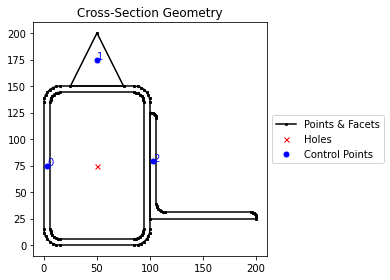

<Axes: title={'center': 'Cross-Section Geometry'}>

In [26]:
geometry = rhs + triangle + angle
geometry.plot_geometry()  # plot the geometry

Create a mesh and section. For the mesh, use a mesh size of 2.5 for
the RHS, 5 for the triangle and 3 for the angle.



Mesh Statistics:

- 6020 nodes

- 2736 elements

- 3 regions

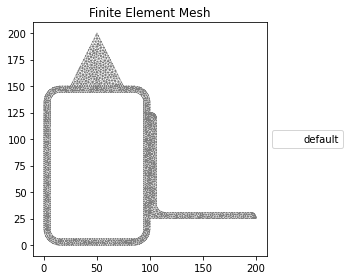

<Axes: title={'center': 'Finite Element Mesh'}>

In [27]:
geometry.create_mesh(mesh_sizes=[2.5, 5, 3])

section = Section(geometry, time_info=True)
section.display_mesh_info()  # display the mesh information
section.plot_mesh()  # plot the generated mesh

Perform a geometric, warping and plastic analysis, displaying the time info
and the iteration info for the plastic analysis



Output()

Output()

Output()

d = -91.996268369166; f_norm = 1.0

d = 108.003731630834; f_norm = -1.0

d = 8.003731630833997; f_norm = -0.04433903442685115

d = 3.5610941851785247; f_norm = -0.013257745358062492

d = 1.6934563166381202; f_norm = -0.00019149964748535968

d = 1.666207547083575; f_norm = -8.635909458075013e-07

d = 1.6660841169311136; f_norm = -5.6994862781888e-11

d = 1.666082783889055; f_norm = 9.269146437289895e-09

---x-axis plastic centroid calculation converged at 1.66608e+00 in 7 iterations.

d = -67.409490017714; f_norm = 1.0

d = 132.590509982286; f_norm = -1.0

d = 32.590509982285994; f_norm = -0.546379783397773

d = -17.409490017714006; f_norm = 0.22681010830111303

d = -2.742322822682775; f_norm = -0.043022470763644426

d = -5.080875765477266; f_norm = -0.011205909614768165

d = -5.8657449981455345; f_norm = 0.0004252464243683582

d = -5.83704941245604; f_norm = -8.433780157994712e-06

d = -5.837607455591706; f_norm = -6.102942204925805e-09

d = -5.837610874395434; f_norm = 4.552923959027148e-08

---y-axis plastic centroid calculation converged at -5.83761e+00 in 9 iterations.

d = -106.16681282996599; f_norm = -1.0

d = 113.6728224117802; f_norm = 1.0

d = 3.753004790907113; f_norm = 0.03943689434659865

d = -0.588643873199187; f_norm = 0.0064103157486017455

d = -1.424880934386569; f_norm = 4.9126448280891056e-05

d = -1.431330697831833; f_norm = 6.360698720324061e-08

d = -1.4313390594740303; f_norm = 6.347923627862756e-13

d = -1.43134027514356; f_norm = -9.246865163494106e-09

---11-axis plastic centroid calculation converged at -1.43134e+00 in 7 iterations.

d = -96.43010376150585; f_norm = -1.0

d = 93.41518522403136; f_norm = 1.0

d = -1.507459268737236; f_norm = 0.24999344301692578

d = -26.819412050693646; f_norm = -0.5136606142451681

d = -9.793701141307244; f_norm = 0.06969393886809326

d = -12.614043035926302; f_norm = -0.015439988274398702

d = -12.10254254200654; f_norm = 0.0009283409099089009

d = -12.13155264001945; f_norm = 1.100285018307733e-05

d = -12.131900348758723; f_norm = -1.890117016569997e-10

d = -12.131893782808548; f_norm = 2.0758838935067447e-07

---22-axis plastic centroid calculation converged at -1.21319e+01 in 9 iterations.

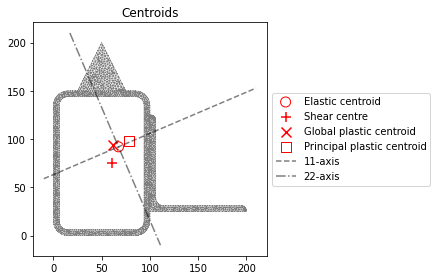

<Axes: title={'center': 'Centroids'}>

In [28]:
section.calculate_geometric_properties()
section.calculate_warping_properties()
section.calculate_plastic_properties(verbose=True)

# plot the centroids
section.plot_centroids()

# 5 Mirroring and Rotating Geometry

Mirror and rotate a cross section.

The following example demonstrates how geometry objects can be mirrored and
rotated. A 200PFC and 150PFC are placed back-to-back by using the
:func:`~sectionproperties.pre.geometry.Geometry.mirror_section` method and are
rotated counter-clockwise by 30 degrees by using the
:func:`~sectionproperties.pre.geometry.Geometry.rotate_section` method. The
geometry is cleaned to ensure there are no overlapping facets along the junction
between the two PFCs. A geometric, warping and plastic analysis is then carried out.

The geometry and mesh are plotted, and the mesh information printed to the terminal
before the analysis is carried out. Detailed time information is printed to the
terminal during the cross-section analysis stage and iteration information printed
for the plastic analysis. Once the analysis is complete, a plot of the various
calculated centroids is generated.


In [29]:
# sphinx_gallery_thumbnail_number = 1

import sectionproperties.pre.library.steel_sections as steel_sections
from sectionproperties.analysis.section import Section

Create a 200PFC and a 150PFC



In [30]:
pfc1 = steel_sections.channel_section(d=203, b=133, t_f=7.8, t_w=5.8, r=8.9, n_r=8)
pfc2 = steel_sections.channel_section(
    d=150, b=133, t_f=7.8, t_w=5.8, r=8.9, n_r=8
).shift_section(0, 26.5)

Mirror the 200 PFC about the y-axis



In [31]:
pfc1 = pfc1.mirror_section(axis="y", mirror_point=[0, 0])

Merge the pfc sections



In [32]:
geometry = ((pfc1 - pfc2) | pfc1) + pfc2

Rotate the geometry counter-clockwise by 30 degrees



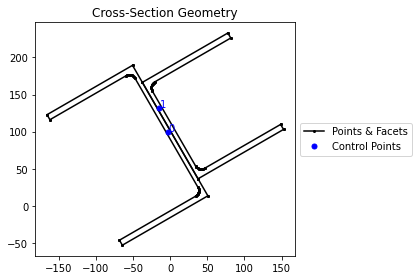

<Axes: title={'center': 'Cross-Section Geometry'}>

In [33]:
geometry = geometry.rotate_section(angle=30)
geometry.plot_geometry()

Create a mesh and section. For the mesh, use a mesh size of 5 for the 200PFC
and 4 for the 150PFC



Mesh Statistics:

- 4850 nodes

- 2157 elements

- 2 regions

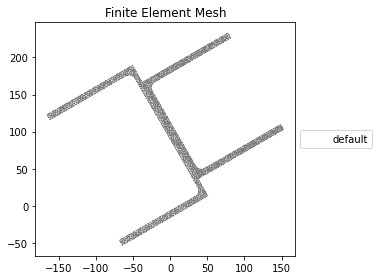

<Axes: title={'center': 'Finite Element Mesh'}>

In [34]:
geometry.create_mesh(mesh_sizes=[5, 4])

section = Section(geometry, time_info=True)
section.display_mesh_info()  # display the mesh information
section.plot_mesh()  # plot the generated mesh

Perform a geometric, warping and plastic analysis, displaying the time info
and the iteration info for the plastic analysis



Output()

Output()

Output()

d = -154.328341319365; f_norm = 1.0

d = 131.525142448589; f_norm = -1.0

d = -11.401599435387993; f_norm = 0.13458389687111885

d = 5.55231463203793; f_norm = -0.021090896125661042

d = 3.255390167671628; f_norm = -0.004055963678927537

d = 2.724499194243151; f_norm = 0.00045100079082289346

d = 2.7776241413031926; f_norm = -9.631031333251518e-06

d = 2.7765133886258857; f_norm = -2.1922919066993703e-08

d = 2.7765108545970905; f_norm = 5.977503270512459e-15

---x-axis plastic centroid calculation converged at 2.77651e+00 in 8 iterations.

d = -165.804528212969; f_norm = 1.0

d = 152.808229193691; f_norm = -1.0

d = -6.498149509638978; f_norm = 0.12894151075699403

d = 11.696951784368366; f_norm = -0.11748181846161726

d = 3.0224744372298193; f_norm = -5.230315361698405e-16

d = 3.022472425992601; f_norm = 2.7238961090721597e-08

---y-axis plastic centroid calculation converged at 3.02247e+00 in 5 iterations.

d = -101.49999999999976; f_norm = -1.0

d = 101.50000000000136; f_norm = 1.0

d = 7.958078640513122e-13; f_norm = 4.10953349847732e-15

d = -4.999992041925338e-07; f_norm = -1.905972795140489e-09

---11-axis plastic centroid calculation converged at 7.95808e-13 in 3 iterations.

d = -133.14647432951304; f_norm = -1.0

d = 132.8535256704867; f_norm = 1.0

d = -0.1464743295131825; f_norm = -0.050508389487418176

d = 6.248158849098923; f_norm = 0.34217314335062415

d = 0.6760309227206123; f_norm = 0.004360272672365583

d = 0.6106685276297984; f_norm = 3.026111030696966e-14

d = 0.6106677222955346; f_norm = -5.3723195071909884e-08

---22-axis plastic centroid calculation converged at 6.10669e-01 in 6 iterations.

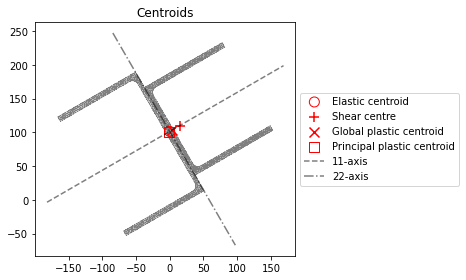

<Axes: title={'center': 'Centroids'}>

In [35]:
section.calculate_geometric_properties()
section.calculate_warping_properties()
section.calculate_plastic_properties(verbose=True)

section.plot_centroids()

# 6 Performing a Stress Analysis

Calculate and plot stresses on a section.

The following example demonstrates how a stress analysis can be performed on a
cross-section. A 150x100x6 RHS is modelled on its side with a maximum mesh area
of 2 mm\ :sup:`2`. The pre-requisite geometric and warping analyses are performed
before two separate stress analyses are undertaken. The first combines bending
and shear about the x-axis with a torsion moment and the second combines bending
and shear about the y-axis with a torsion moment.

After the analysis is performed, various plots of the stresses are generated.


In [36]:
# sphinx_gallery_thumbnail_number = 1

import sectionproperties.pre.library.steel_sections as steel_sections
from sectionproperties.analysis.section import Section

Create a 150x100x6 RHS on its side



In [37]:
geometry = steel_sections.rectangular_hollow_section(d=100, b=150, t=6, r_out=15, n_r=8)

Create a mesh and section object. For the mesh, use a maximum area of 2



In [38]:
geometry.create_mesh(mesh_sizes=[2])
section = Section(geometry)

Perform a geometry and warping analysis



In [39]:
section.calculate_geometric_properties()
section.calculate_warping_properties()

Perform a stress analysis with Mx = 5 kN.m; Vx = 10 kN and Mzz = 3 kN.m



In [40]:
case1 = section.calculate_stress(mxx=5e6, vx=10e3, mzz=3e6)

Perform a stress analysis with My = 15 kN.m; Vy = 30 kN and Mzz = 1.5 kN.m



In [41]:
case2 = section.calculate_stress(myy=15e6, vy=30e3, mzz=1.5e6)

Plot the bending stress for case1



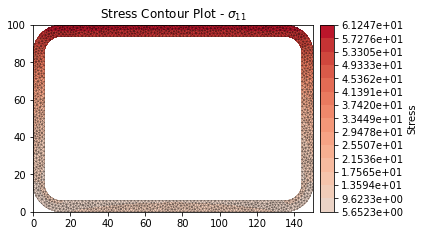

<Axes: title={'center': 'Stress Contour Plot - $\\sigma_{11}$'}>

In [42]:
case1.plot_stress(stress="11")

Plot the torsion vectors for case1



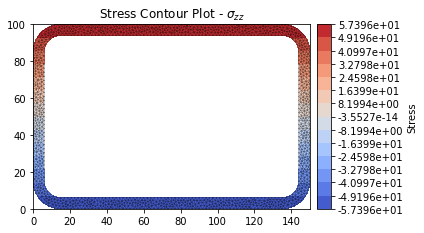

<Axes: title={'center': 'Stress Contour Plot - $\\sigma_{zz}$'}>

In [43]:
case1.plot_stress(stress="zz")

Plot the shear stress for case2



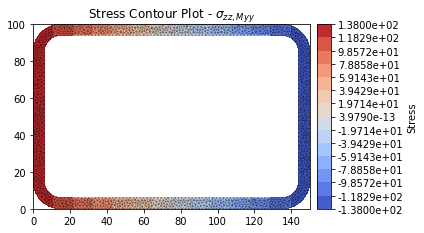

<Axes: title={'center': 'Stress Contour Plot - $\\sigma_{zz,Myy}$'}>

In [44]:
case2.plot_stress(stress="myy_zz")

Plot the von mises stress for case1



# 7 Creating a Composite Section

Create a section of mixed materials.

The following example demonstrates how to create a composite cross-section by assigning
different material properties to various regions of the mesh. A steel 310UB40.4 is modelled
with a 50Dx600W timber panel placed on its top flange.

The geometry and mesh are plotted, and the mesh information printed to the terminal
before the analysis is carried out. All types of cross-section analyses are carried
out, with an axial force, bending moment and shear force applied during the stress
analysis. Once the analysis is complete, the cross-section properties are printed
to the terminal and a plot of the centroids and cross-section stresses generated.


In [45]:
# sphinx_gallery_thumbnail_number = 2

import sectionproperties.pre.library.primitive_sections as sections
import sectionproperties.pre.library.steel_sections as steel_sections
from sectionproperties.pre.geometry import CompoundGeometry
from sectionproperties.pre.pre import Material
from sectionproperties.analysis.section import Section

Create material properties



In [46]:
steel = Material(
    name="Steel",
    elastic_modulus=200e3,
    poissons_ratio=0.3,
    yield_strength=500,
    density=8.05e-6,
    color="grey",
)
timber = Material(
    name="Timber",
    elastic_modulus=8e3,
    poissons_ratio=0.35,
    yield_strength=20,
    density=0.78e-6,
    color="burlywood",
)

Create 310UB40.4



In [47]:
ub = steel_sections.i_section(
    d=304, b=165, t_f=10.2, t_w=6.1, r=11.4, n_r=8, material=steel
)

Create timber panel on top of the UB



In [48]:
panel = sections.rectangular_section(d=50, b=600, material=timber)
panel = panel.align_center(ub).align_to(ub, on="top")
# Create intermediate nodes in panel to match nodes in ub
panel = (panel - ub) | panel

Merge the two sections into one geometry object



In [49]:
section_geometry = CompoundGeometry([ub, panel])

Create a mesh and a Section object. For the mesh use a mesh size of 5 for
the UB, 20 for the panel



In [50]:
section_geometry.create_mesh(mesh_sizes=[5, 20])
comp_section = Section(section_geometry, time_info=True)
comp_section.display_mesh_info()  # display the mesh information

Mesh Statistics:

- 9083 nodes

- 4246 elements

- 2 regions

Plot the mesh with coloured materials and a line transparency of 0.6



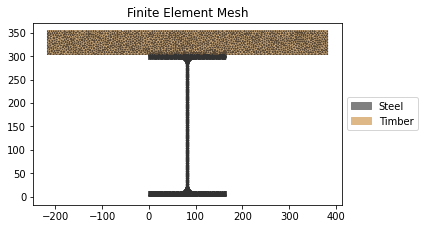

<Axes: title={'center': 'Finite Element Mesh'}>

In [51]:
comp_section.plot_mesh(materials=True, alpha=0.6)

Perform a geometric, warping and plastic analysis



In [52]:
comp_section.calculate_geometric_properties()
comp_section.calculate_warping_properties()
comp_section.calculate_plastic_properties(verbose=True)

Output()

Output()

Output()

d = -185.130884950272; f_norm = 1.0

d = 168.869115049728; f_norm = -1.0

d = -8.13088495027199; f_norm = 0.13960518846748188

d = 13.5521668722403; f_norm = 0.0983423820518058

d = 60.60270845168366; f_norm = 0.008805290832494688

d = 64.90008929872147; f_norm = 0.000627383246551551

d = 65.22746216923495; f_norm = 4.393296043904811e-06

d = 65.22976962543778; f_norm = 2.21127426308038e-09

d = 65.2298027403226; f_norm = -6.080628894287011e-08

---x-axis plastic centroid calculation converged at 6.52298e+01 in 8 iterations.

d = -300.0; f_norm = 1.0

d = 300.0; f_norm = -1.0

d = 0.0; f_norm = 7.263545449900235e-17

d = 5e-07; f_norm = -4.773093592438759e-08

---y-axis plastic centroid calculation converged at 0.00000e+00 in 3 iterations.

d = -185.130884950272; f_norm = 1.0

d = 168.869115049728; f_norm = -1.0

d = -8.13088495027199; f_norm = 0.13960518846748188

d = 13.5521668722403; f_norm = 0.0983423820518058

d = 60.60270845168366; f_norm = 0.008805290832494688

d = 64.90008929872147; f_norm = 0.000627383246551551

d = 65.22746216923495; f_norm = 4.393296043904811e-06

d = 65.22976962543778; f_norm = 2.21127426308038e-09

d = 65.2298027403226; f_norm = -6.080628894287011e-08

---11-axis plastic centroid calculation converged at 6.52298e+01 in 8 iterations.

d = -300.0; f_norm = 1.0

d = 300.0; f_norm = -1.0

d = 0.0; f_norm = 7.263545449900235e-17

d = 5e-07; f_norm = -4.773093592438759e-08

---22-axis plastic centroid calculation converged at 0.00000e+00 in 3 iterations.

Perform a stress analysis with N = 100 kN, Mxx = 120 kN.m and Vy = 75 kN



In [53]:
stress_post = comp_section.calculate_stress(n=-100e3, mxx=-120e6, vy=-75e3)

Output()

Print the results to the terminal



In [54]:
comp_section.display_results()

     Section Properties      
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property  ┃         Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ area      │  3.521094e+04 │
│ perimeter │  2.206078e+03 │
│ mass      │  6.534804e-02 │
│ e.a       │  1.282187e+09 │
│ e.qx      │  2.373725e+11 │
│ e.qy      │  1.057805e+11 │
│ e.ixx_g   │  6.740447e+13 │
│ e.iyy_g   │  1.745613e+13 │
│ e.ixy_g   │  1.958323e+13 │
│ cx        │  8.250000e+01 │
│ cy        │  1.851309e+02 │
│ e.ixx_c   │  2.345949e+13 │
│ e.iyy_c   │  8.729240e+12 │
│ e.ixy_c   │  2.734375e-02 │
│ e.zxx+    │  1.389212e+11 │
│ e.zxx-    │  1.267184e+11 │
│ e.zyy+    │  2.909747e+10 │
│ e.zyy-    │  2.909747e+10 │
│ rx        │  1.352644e+02 │
│ ry        │  8.251112e+01 │
│ e.i11_c   │  2.345949e+13 │
│ e.i22_c   │  8.729240e+12 │
│ phi       │  0.000000e+00 │
│ e.z11+    │  1.389212e+11 │
│ e.z11-    │  1.267184e+11 │
│ e.z22+    │  2.909747e+10 │
│ e.z22-    │  2.909747e+10 │
│ r11       │  1.352644e+02 │
│ r22       │  8.251112e+01 │
│ e_eff     │  3.641446e+04 │
│ g_eff     │  1.390847e+04 │
│ nu_eff    │  3.090753e-01 │
│ e.j       │  3.768367e+11 │
│ x_se      │  8.250105e+01 │
│ y_se      │  2.863411e+02 │
│ x1_se     │  1.049231e-03 │
│ y2_se     │  1.012102e+02 │
│ x_st      │  8.250104e+01 │
│ y_st      │  2.857085e+02 │
│ e.gamma   │  6.687734e+16 │
│ e.a_sx    │  4.022647e+08 │
│ e.a_sy    │  3.718571e+08 │
│ e.a_s11   │  4.022647e+08 │
│ e.a_s22   │  3.718571e+08 │
│ beta_x+   │  2.039435e+02 │
│ beta_x-   │ -2.039435e+02 │
│ beta_y+   │  2.098462e-03 │
│ beta_y-   │ -2.098462e-03 │
│ beta_11+  │  2.039435e+02 │
│ beta_11-  │ -2.039435e+02 │
│ beta_22+  │  2.098462e-03 │
│ beta_22-  │ -2.098462e-03 │
│ x_pc      │  8.250000e+01 │
│ y_pc      │  2.503607e+02 │
│ x11_pc    │  8.250000e+01 │
│ y22_pc    │  2.503607e+02 │
│ mp_xx     │  4.238101e+08 │
│ mp_yy     │  4.226021e+08 │
│ mp_11     │  4.238101e+08 │
│ mp_22     │  4.226021e+08 │
└───────────┴───────────────┘

Plot the centroids



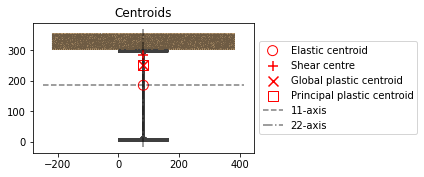

<Axes: title={'center': 'Centroids'}>

In [55]:
comp_section.plot_centroids()

Plot the axial stress



# 8 Frame Analysis Example

Analyse a cross-section to be used in frame analysis.

The following example demonstrates how *sectionproperties* can be used to
calculate the cross-section properties required for a frame analysis. Using this
method is preferred over executing a geometric and warping analysis as only variables
required for a frame analysis are computed. In this example the torsion constant of
a rectangular section is calculated for a number of different mesh sizes and the
accuracy of the result compared with the time taken to obtain the solution.


In [56]:
# sphinx_gallery_thumbnail_number = 1

import time
import numpy as np
import matplotlib.pyplot as plt
import sectionproperties.pre.library.primitive_sections as sections
from sectionproperties.analysis.section import Section

Create a rectangular section



In [57]:
geometry = sections.rectangular_section(d=100, b=50)

Create a list of mesh sizes to analyse



In [58]:
mesh_sizes = [3, 4, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 200]
j_calc = []  # list to store torsion constants
t_calc = []  # list to store computation times

Loop through mesh sizes



In [59]:
for mesh_size in mesh_sizes:
    geometry.create_mesh(mesh_sizes=[mesh_size])  # create mesh
    section = Section(geometry)  # create a Section object
    start_time = time.time()  # start timing
    # calculate the frame properties
    (_, _, _, _, j, _) = section.calculate_frame_properties()
    t = time.time() - start_time  # stop timing
    t_calc.append(t)  # save the time
    j_calc.append(j)  # save the torsion constant
    # print the result
    str = "Mesh Size: {0}; ".format(mesh_size)
    str += "Solution Time {0:.5f} s; ".format(t)
    str += "Torsion Constant: {0:.12e}".format(j)
    print(str)

Mesh Size: 3; Solution Time 3.07929 s; Torsion Constant: 2.858525191518e+06
Mesh Size: 4; Solution Time 2.35015 s; Torsion Constant: 2.858529348617e+06
Mesh Size: 5; Solution Time 1.68847 s; Torsion Constant: 2.858533994778e+06
Mesh Size: 10; Solution Time 0.84268 s; Torsion Constant: 2.858564308063e+06
Mesh Size: 15; Solution Time 0.53706 s; Torsion Constant: 2.858628499542e+06
Mesh Size: 20; Solution Time 0.40043 s; Torsion Constant: 2.858670496343e+06
Mesh Size: 25; Solution Time 0.33810 s; Torsion Constant: 2.858748138885e+06
Mesh Size: 30; Solution Time 0.27300 s; Torsion Constant: 2.858865014806e+06
Mesh Size: 40; Solution Time 0.21869 s; Torsion Constant: 2.858947255775e+06
Mesh Size: 50; Solution Time 0.16271 s; Torsion Constant: 2.859438375764e+06
Mesh Size: 75; Solution Time 0.12049 s; Torsion Constant: 2.860241467603e+06
Mesh Size: 100; Solution Time 0.07812 s; Torsion Constant: 2.861326245766e+06
Mesh Size: 200; Solution Time 0.03125 s; Torsion Constant: 2.869013885610e+06


Compute the error, assuming that the finest mesh (index 0) gives the 'correct' value



In [60]:
correct_val = j_calc[0]
j_np = np.array(j_calc)
error_vals = (j_calc - correct_val) / j_calc * 100

Produce a plot of the accuracy of the torsion constant with computation time



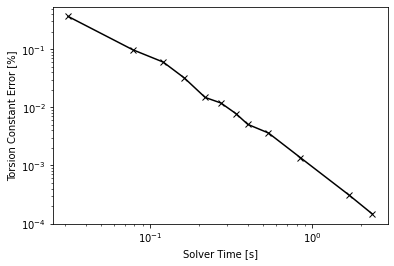

In [61]:
plt.loglog(t_calc[1:], error_vals[1:], "kx-")
plt.xlabel("Solver Time [s]")
plt.ylabel("Torsion Constant Error [%]")
plt.show()

# 9 Importing Geometry from CAD DXF
CRASHING

Demonstrates loading :class:`~sectionproperties.pre.geometry.Geometry` and
:class:`~sectionproperties.pre.geometry.CompoundGeometry` objects from `.dxf` and `.3dm` (Rhino)
files.


In [62]:
# sphinx_gallery_thumbnail_number = 8

!pip install cad_to_shapely
# install once if needed
from sectionproperties.pre.geometry import Geometry, CompoundGeometry
from sectionproperties.analysis.section import Section

Load a geometry with a single region from a dxf file



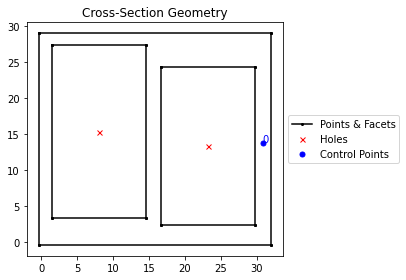

<Axes: title={'center': 'Cross-Section Geometry'}>

In [63]:
geom = Geometry.from_dxf(dxf_filepath="assets/section_holes.dxf")
geom.plot_geometry()

Generate a mesh



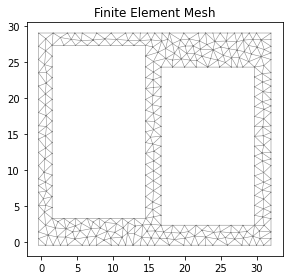

<Axes: title={'center': 'Finite Element Mesh'}>

In [64]:
geom.create_mesh([1])
sec = Section(geom)
sec.plot_mesh(materials=False)

Conduct a geometric & plastic analysis



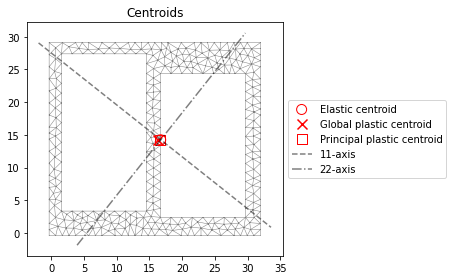

<Axes: title={'center': 'Centroids'}>

In [65]:
sec.calculate_geometric_properties()
sec.calculate_plastic_properties()
sec.plot_centroids()

Display the geometric & plastic properties



In [66]:
sec.display_results()

     Section Properties      
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property  ┃         Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ area      │  3.543777e+02 │
│ perimeter │  1.235768e+02 │
│ qx        │  5.047390e+03 │
│ qy        │  5.923689e+03 │
│ ixx_g     │  1.137665e+05 │
│ iyy_g     │  1.387654e+05 │
│ ixy_g     │  8.892907e+04 │
│ cx        │  1.671575e+01 │
│ cy        │  1.424297e+01 │
│ ixx_c     │  4.187664e+04 │
│ iyy_c     │  3.974650e+04 │
│ ixy_c     │  4.558164e+03 │
│ zxx+      │  2.820099e+03 │
│ zxx-      │  2.860789e+03 │
│ zyy+      │  2.606925e+03 │
│ zyy-      │  2.330570e+03 │
│ rx        │  1.087058e+01 │
│ ry        │  1.059049e+01 │
│ i11_c     │  4.549251e+04 │
│ i22_c     │  3.613063e+04 │
│ phi       │ -3.842404e+01 │
│ z11+      │  2.155143e+03 │
│ z11-      │  2.061571e+03 │
│ z22+      │  1.717082e+03 │
│ z22-      │  1.599443e+03 │
│ r11       │  1.133018e+01 │
│ r22       │  1.009728e+01 │
│ x_pc      │  1.626707e+01 │
│ y_pc      │  1.427513e+01 │
│ x11_pc    │  1.662479e+01 │
│ y22_pc    │  1.427103e+01 │
│ sxx       │  3.548750e+03 │
│ syy       │  3.153834e+03 │
│ s11       │  3.492177e+03 │
│ s22       │  2.898242e+03 │
│ sf_xx+    │  1.258378e+00 │
│ sf_xx-    │  1.240479e+00 │
│ sf_yy+    │  1.209791e+00 │
│ sf_yy-    │  1.353246e+00 │
│ sf_11+    │  1.620392e+00 │
│ sf_11-    │  1.693940e+00 │
│ sf_22+    │  1.687888e+00 │
│ sf_22-    │  1.812032e+00 │
└───────────┴───────────────┘

Load a geometry with multiple holes from a dxf file



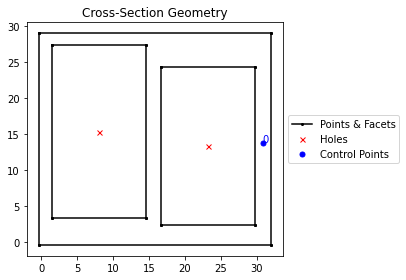

<Axes: title={'center': 'Cross-Section Geometry'}>

In [67]:
geom = Geometry.from_dxf(dxf_filepath="assets/section_holes.dxf")
geom.plot_geometry()

Generate a mesh



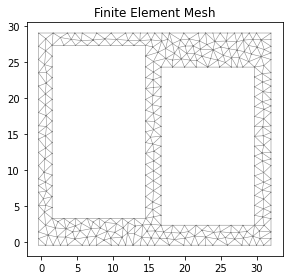

<Axes: title={'center': 'Finite Element Mesh'}>

In [68]:
geom.create_mesh([1])
sec = Section(geom)
sec.plot_mesh(materials=False)

Conduct a geometric & plastic analysis



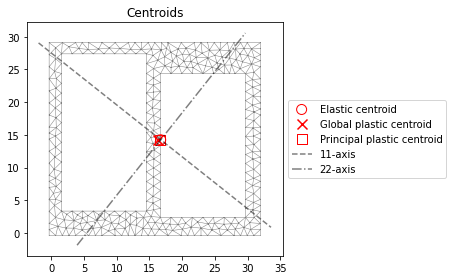

<Axes: title={'center': 'Centroids'}>

In [69]:
sec.calculate_geometric_properties()
sec.calculate_plastic_properties()
sec.plot_centroids()

Display the geometric & plastic properties



In [70]:
sec.display_results()

     Section Properties      
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property  ┃         Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ area      │  3.543777e+02 │
│ perimeter │  1.235768e+02 │
│ qx        │  5.047390e+03 │
│ qy        │  5.923689e+03 │
│ ixx_g     │  1.137665e+05 │
│ iyy_g     │  1.387654e+05 │
│ ixy_g     │  8.892907e+04 │
│ cx        │  1.671575e+01 │
│ cy        │  1.424297e+01 │
│ ixx_c     │  4.187664e+04 │
│ iyy_c     │  3.974650e+04 │
│ ixy_c     │  4.558164e+03 │
│ zxx+      │  2.820099e+03 │
│ zxx-      │  2.860789e+03 │
│ zyy+      │  2.606925e+03 │
│ zyy-      │  2.330570e+03 │
│ rx        │  1.087058e+01 │
│ ry        │  1.059049e+01 │
│ i11_c     │  4.549251e+04 │
│ i22_c     │  3.613063e+04 │
│ phi       │ -3.842404e+01 │
│ z11+      │  2.155143e+03 │
│ z11-      │  2.061571e+03 │
│ z22+      │  1.717082e+03 │
│ z22-      │  1.599443e+03 │
│ r11       │  1.133018e+01 │
│ r22       │  1.009728e+01 │
│ x_pc      │  1.626707e+01 │
│ y_pc      │  1.427513e+01 │
│ x11_pc    │  1.662479e+01 │
│ y22_pc    │  1.427103e+01 │
│ sxx       │  3.548750e+03 │
│ syy       │  3.153834e+03 │
│ s11       │  3.492177e+03 │
│ s22       │  2.898242e+03 │
│ sf_xx+    │  1.258378e+00 │
│ sf_xx-    │  1.240479e+00 │
│ sf_yy+    │  1.209791e+00 │
│ sf_yy-    │  1.353246e+00 │
│ sf_11+    │  1.620392e+00 │
│ sf_11-    │  1.693940e+00 │
│ sf_22+    │  1.687888e+00 │
│ sf_22-    │  1.812032e+00 │
└───────────┴───────────────┘

Load a geometry from a 3dm (Rhino) file



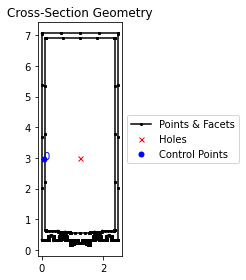

<Axes: title={'center': 'Cross-Section Geometry'}>

In [71]:
# !pip install rhino-shapley-interop

geom = Geometry.from_3dm(filepath="assets/complex_shape.3dm")
geom.plot_geometry()

Generate a mesh



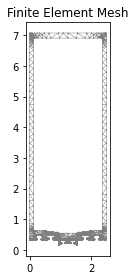

<Axes: title={'center': 'Finite Element Mesh'}>

In [72]:
geom.create_mesh([1])
sec = Section(geom)
sec.plot_mesh(materials=False)

Conduct a geometric & plastic analysis



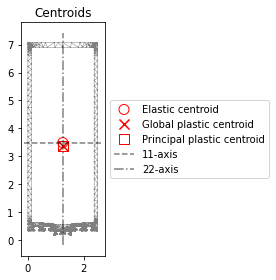

<Axes: title={'center': 'Centroids'}>

In [73]:
sec.calculate_geometric_properties()
sec.calculate_plastic_properties()
sec.plot_centroids()

Display the geometric & plastic properties



In [74]:
sec.display_results()

     Section Properties     
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Property  ┃        Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ area      │ 2.602049e+00 │
│ perimeter │ 2.130651e+01 │
│ qx        │ 9.082300e+00 │
│ qy        │ 3.252560e+00 │
│ ixx_g     │ 4.773758e+01 │
│ iyy_g     │ 6.824622e+00 │
│ ixy_g     │ 1.135287e+01 │
│ cx        │ 1.249999e+00 │
│ cy        │ 3.490441e+00 │
│ ixx_c     │ 1.603635e+01 │
│ iyy_c     │ 2.758925e+00 │
│ ixy_c     │ 5.755182e-06 │
│ zxx+      │ 4.476583e+00 │
│ zxx-      │ 4.813398e+00 │
│ zyy+      │ 2.207139e+00 │
│ zyy-      │ 2.207142e+00 │
│ rx        │ 2.482533e+00 │
│ ry        │ 1.029704e+00 │
│ i11_c     │ 1.603635e+01 │
│ i22_c     │ 2.758925e+00 │
│ phi       │ 0.000000e+00 │
│ z11+      │ 4.476583e+00 │
│ z11-      │ 4.813398e+00 │
│ z22+      │ 2.207139e+00 │
│ z22-      │ 2.207142e+00 │
│ r11       │ 2.482533e+00 │
│ r22       │ 1.029704e+00 │
│ x_pc      │ 1.249996e+00 │
│ y_pc      │ 3.353406e+00 │
│ x11_pc    │ 1.249996e+00 │
│ y22_pc    │ 3.353406e+00 │
│ sxx       │ 5.801661e+00 │
│ syy       │ 2.504936e+00 │
│ s11       │ 5.801661e+00 │
│ s22       │ 2.504936e+00 │
│ sf_xx+    │ 1.296002e+00 │
│ sf_xx-    │ 1.205315e+00 │
│ sf_yy+    │ 1.134925e+00 │
│ sf_yy-    │ 1.134923e+00 │
│ sf_11+    │ 1.296002e+00 │
│ sf_11-    │ 1.205315e+00 │
│ sf_22+    │ 1.134925e+00 │
│ sf_22-    │ 1.134923e+00 │
└───────────┴──────────────┘

Load a compound geometry with multiple regions from a 3dm (Rhino) file



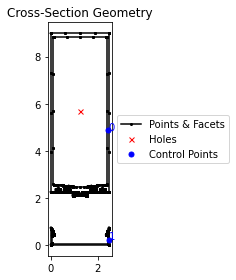

<Axes: title={'center': 'Cross-Section Geometry'}>

In [75]:
geom = CompoundGeometry.from_3dm(filepath="assets/compound_shape.3dm")
geom.plot_geometry()

Generate a mesh



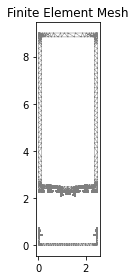

<Axes: title={'center': 'Finite Element Mesh'}>

In [76]:
geom.create_mesh([1])
sec = Section(geom)
sec.plot_mesh(materials=False)

Conduct a geometric & plastic analysis
N.B a warping analysis would be invalid due to the lack of connectivity between the two regions



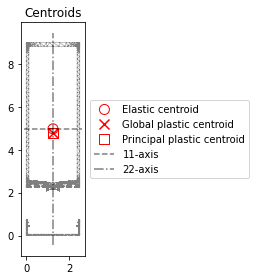

<Axes: title={'center': 'Centroids'}>

In [77]:
sec.calculate_geometric_properties()
sec.calculate_plastic_properties()
sec.plot_centroids()

Display the geometric & plastic properties



In [78]:
sec.display_results()

     Section Properties      
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property  ┃         Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ area      │  2.838725e+00 │
│ perimeter │ -1.000000e+00 │
│ qx        │  1.413033e+01 │
│ qy        │  3.548404e+00 │
│ ixx_g     │  9.237156e+01 │
│ iyy_g     │  7.393179e+00 │
│ ixy_g     │  1.766291e+01 │
│ cx        │  1.249999e+00 │
│ cy        │  4.977702e+00 │
│ ixx_c     │  2.203499e+01 │
│ iyy_c     │  2.957676e+00 │
│ ixy_c     │  4.909920e-06 │
│ zxx+      │  5.480936e+00 │
│ zxx-      │  4.426740e+00 │
│ zyy+      │  2.366139e+00 │
│ zyy-      │  2.366142e+00 │
│ rx        │  2.786088e+00 │
│ ry        │  1.020736e+00 │
│ i11_c     │  2.203499e+01 │
│ i22_c     │  2.957676e+00 │
│ phi       │  0.000000e+00 │
│ z11+      │  5.480936e+00 │
│ z11-      │  4.426740e+00 │
│ z22+      │  2.366139e+00 │
│ z22-      │  2.366142e+00 │
│ r11       │  2.786088e+00 │
│ r22       │  1.020736e+00 │
│ x_pc      │  1.249996e+00 │
│ y_pc      │  4.805339e+00 │
│ x11_pc    │  1.249996e+00 │
│ y22_pc    │  4.805339e+00 │
│ sxx       │  6.956641e+00 │
│ syy       │  2.699474e+00 │
│ s11       │  6.956641e+00 │
│ s22       │  2.699474e+00 │
│ sf_xx+    │  1.269243e+00 │
│ sf_xx-    │  1.571504e+00 │
│ sf_yy+    │  1.140877e+00 │
│ sf_yy-    │  1.140876e+00 │
│ sf_11+    │  1.269243e+00 │
│ sf_11-    │  1.571504e+00 │
│ sf_22+    │  1.140877e+00 │
│ sf_22-    │  1.140876e+00 │
└───────────┴───────────────┘